# Resultados de la 2a simulacion usando Dinamica Browniana

In [1]:
from __future__ import unicode_literals
from matplotlib import pyplot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from pylab import rcParams
from matplotlib.font_manager import FontProperties
import scipy.special

from matplotlib import cm, colors

import numpy as np
import math
import pandas as pd
from matplotlib.pyplot import figure, show
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import LinearLocator

from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
pyplot.rcParams['text.usetex'] = False
pyplot.rcParams['text.latex.unicode'] = False
import matplotlib.pyplot as plt

In [2]:
potencial = np.loadtxt('pot300.dat')
potencial2 = np.loadtxt('pot300-0.5.dat')
potencial3 = np.loadtxt('pot300-1.0.dat')
potencial4 = np.loadtxt('pot300-1.5.dat')
potencial5 = np.loadtxt('pot300-2.0.dat')
potencial6 = np.loadtxt('pot300-2.5.dat')

e = np.loadtxt('e2.dat')

g = np.loadtxt('g2.dat', skiprows=2)
g2 = np.loadtxt('g2-0.5.dat', skiprows=2)
g3 = np.loadtxt('g2-1.0.dat', skiprows=2)
g4 = np.loadtxt('g2-1.5.dat', skiprows=2)
g5 = np.loadtxt('g2-2.0.dat', skiprows=2)
g6 = np.loadtxt('g2-2.5.dat', skiprows=2)
g7 = np.loadtxt('g-MC.dat', skiprows=2)

fself = np.loadtxt('Fself2.dat')
fself2 = np.loadtxt('Fself2-0.5.dat')
fself3 = np.loadtxt('Fself2-1.0.dat')
fself4 = np.loadtxt('Fself2-1.5.dat')
fself5 = np.loadtxt('Fself2-2.0.dat')
fself6 = np.loadtxt('Fself2-2.5.dat')


data0 = np.loadtxt('conf_fin.dat').T
xf0 = np.asarray(data0[0])
yf0 = np.asarray(data0[1])
zf0 = np.asarray(data0[2])
data1 = np.loadtxt('conf_fin2.dat').T
xf1 = np.asarray(data1[0])
yf1 = np.asarray(data1[1])
zf1 = np.asarray(data1[2])
data2 = np.loadtxt('conf_fin2-0.5.dat').T
xf2 = np.asarray(data2[0])
yf2 = np.asarray(data2[1])
zf2 = np.asarray(data2[2])
data3 = np.loadtxt('conf_fin2-1.0.dat').T
xf3 = np.asarray(data3[0])
yf3 = np.asarray(data3[1])
zf3 = np.asarray(data3[2])
data4 = np.loadtxt('conf_fin2-1.5.dat').T
xf4 = np.asarray(data4[0])
yf4 = np.asarray(data4[1])
zf4 = np.asarray(data4[2])
data5 = np.loadtxt('conf_fin2-2.0.dat').T
xf5 = np.asarray(data5[0])
yf5 = np.asarray(data5[1])
zf5 = np.asarray(data5[2])
data6 = np.loadtxt('conf_fin2-2.5.dat').T
xf6 = np.asarray(data6[0])
yf6 = np.asarray(data6[1])
zf6 = np.asarray(data6[2])

In [6]:
# Medicion para saber si la distancia entre particulas es menor a rc 
diametro = 0.000001
phi = 0.1
dd = math.pow(3.14159265358 * diametro * diametro * diametro / (6 * phi),1 / 3)
rc=1.25 * diametro / dd
bl = 7

# Definimos una funcion para calcular las distancias menores al radio rc 
def distancia(x1,y1,z1):
    npa = []
    i=0
    while i <= (len(x1) - 1):
        vecinos = 0
        j = 0
        while j <= len(x1) - 1:
            if(j!=i):
                xij = x1[j]-x1[i]
                yij = y1[j]-y1[i]
                zij = z1[j]-z1[i]     
                xij = xij-bl*np.int_(np.round(xij / bl))
                yij = yij-bl*np.int_(np.round(yij / bl))
                zij = zij-bl*np.int_(np.round(zij / bl))
                rij = pow((xij**2 + yij**2 + zij** 2), 0.5)
                if(rij <= rc):
                    vecinos += 1
            j += 1
        npa.append(vecinos)
        i += 1
    return npa


In [7]:
# Funcion para calcular el tiempo de vida medio. El valor que se ingresa corresponde a la variable dependiente y se retorna la variable independiente
def find(x1, y1, valor):
    v0 = 10
    v1 = 10
    loc = 0
    loc0 = 0
    i = 0
    while i <= len(x1) - 1:
        dif = math.fabs(valor - y1[i])
        if (dif <= v0):
            v0 = dif
            loc0 = i
        i+=1
    p1 = math.fabs(y1[loc0 + 1] - valor)
    p2 = math.fabs(y1[loc0 - 1] - valor)
    if (p1 < p2):
        loc1 = loc0 + 1
    if (p1 >= p2):
        loc1 = loc0 - 1        
    m = (y1[loc1]-y1[loc0])/(x1[loc1]-x1[loc0])
    b = y1[loc0] - m * x1[loc0]
    x = (valor - b) / m
    return x, loc0

In [8]:
# Funcion para graficar esferas 
def plot_spheres(xps, yps, zps):
    for elem in zip(xps, yps, zps):
        axp, ayp, azp = elem
        # print(elem)
        dx = x + axp
        dy = y + ayp
        dz = z + azp
        ax.plot_surface(dx, dy, dz,  rstride=1, cstride=1, color='tab:orange', alpha=0.11, linewidth=0)

In [9]:
# Se calculan arreglos dentro de caja de bl=7  (solo para graficar las configuraciones finales)
x0 = xf0 - bl * np.int_(np.round(xf0 / bl))
y0 = yf0 - bl * np.int_(np.round(yf0 / bl))
z0 = zf0 - bl * np.int_(np.round(zf0 / bl))
x1 = xf1 - bl * np.int_(np.round(xf1 / bl))
y1 = yf1 - bl * np.int_(np.round(yf1 / bl))
z1 = zf1 - bl * np.int_(np.round(zf1 / bl))
x2 = xf2 - bl * np.int_(np.round(xf2 / bl))
y2 = yf2 - bl * np.int_(np.round(yf2 / bl))
z2 = zf2 - bl * np.int_(np.round(zf2 / bl))
x3 = xf3 - bl * np.int_(np.round(xf3 / bl))
y3 = yf3 - bl * np.int_(np.round(yf3 / bl))
z3 = zf3 - bl * np.int_(np.round(zf3 / bl))
x4 = xf4 - bl * np.int_(np.round(xf4 / bl))
y4 = yf4 - bl * np.int_(np.round(yf4 / bl))
z4 = zf4 - bl * np.int_(np.round(zf4 / bl))
x5 = xf5 - bl * np.int_(np.round(xf5 / bl))
y5 = yf5 - bl * np.int_(np.round(yf5 / bl))
z5 = zf5 - bl * np.int_(np.round(zf5 / bl))
x6 = xf6 - bl * np.int_(np.round(xf6 / bl))
y6 = yf6 - bl * np.int_(np.round(yf6 / bl))
z6 = zf6 - bl * np.int_(np.round(zf6 / bl))

In [10]:
#Calculamos las distancias entre las particulas
vec0 = distancia(xf0, yf0, zf0)
vec1 = distancia(xf1, yf1, zf1)
vec2 = distancia(xf2, yf2, zf2)
vec3 = distancia(xf3, yf3, zf3)
vec4 = distancia(xf4, yf4, zf4)
vec5 = distancia(xf5, yf5, zf5)
vec6 = distancia(xf6, yf6, zf6)

## Grafica del potencial (nk=300)

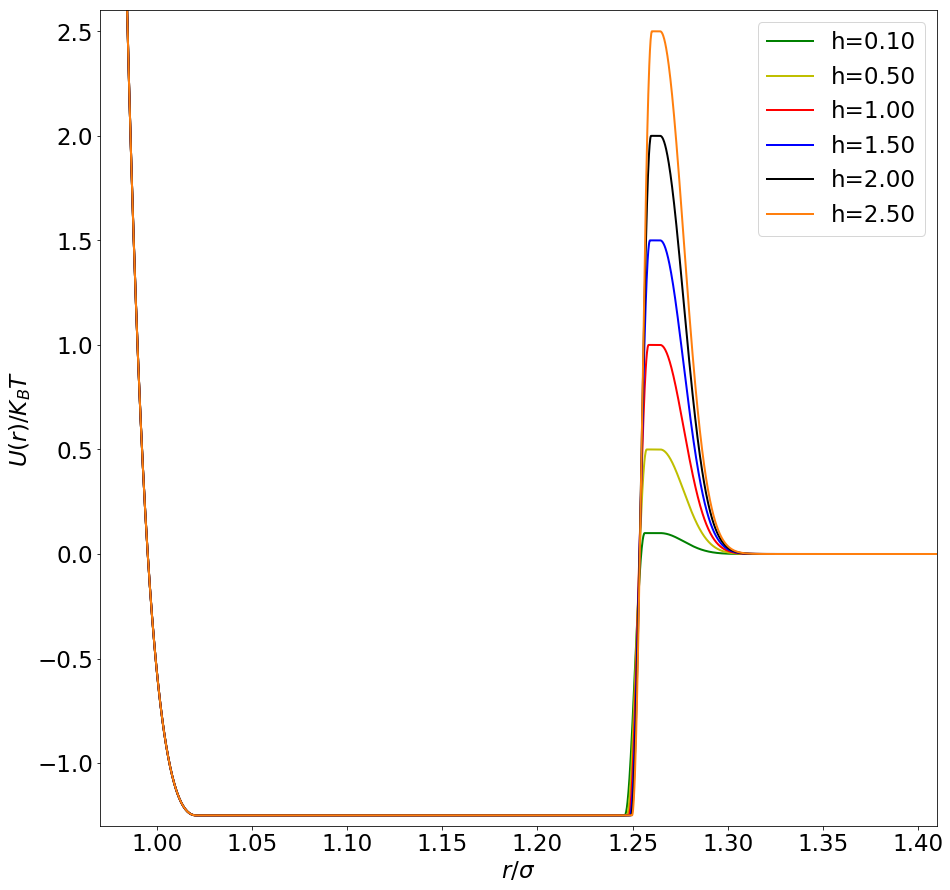

In [39]:
plt.rcParams["figure.figsize"] = (15,15)
plt.rcParams.update({'font.size':23})
lw = 2
plt.plot(potencial[0:,0], potencial[0:,1], color='g', label="h=0.10", linewidth = lw)
plt.plot(potencial2[0:,0], potencial2[0:,1], color='y', label="h=0.50", linewidth = lw)
plt.plot(potencial3[0:,0], potencial3[0:,1], color='r', label="h=1.00", linewidth = lw)
plt.plot(potencial4[0:,0], potencial4[0:,1], color='b', label="h=1.50", linewidth = lw)
plt.plot(potencial5[0:,0], potencial5[0:,1], color='k', label="h=2.00", linewidth = lw)
plt.plot(potencial6[0:,0], potencial6[0:,1], color='tab:orange', label="h=2.50", linewidth = lw)
plt.ylim(-1.3,2.6)
plt.xlim(0.97,1.41)
#plt.text(1, 1, '$\mathit{U(r)/K_{B}T}$')
plt.ylabel('$U(r)/K_{B}T$') 
plt.xlabel("$r/\sigma$")
#plt.ylabel(' ') 
#plt.xlabel(' ')

plt.legend()
plt.savefig("Grafica_de_potenciales.pdf", bbox_inches='tight')
plt.savefig("Grafica_de_potenciales.jpg", bbox_inches='tight')

## Grafica de factor de distribucion radial g(r) 

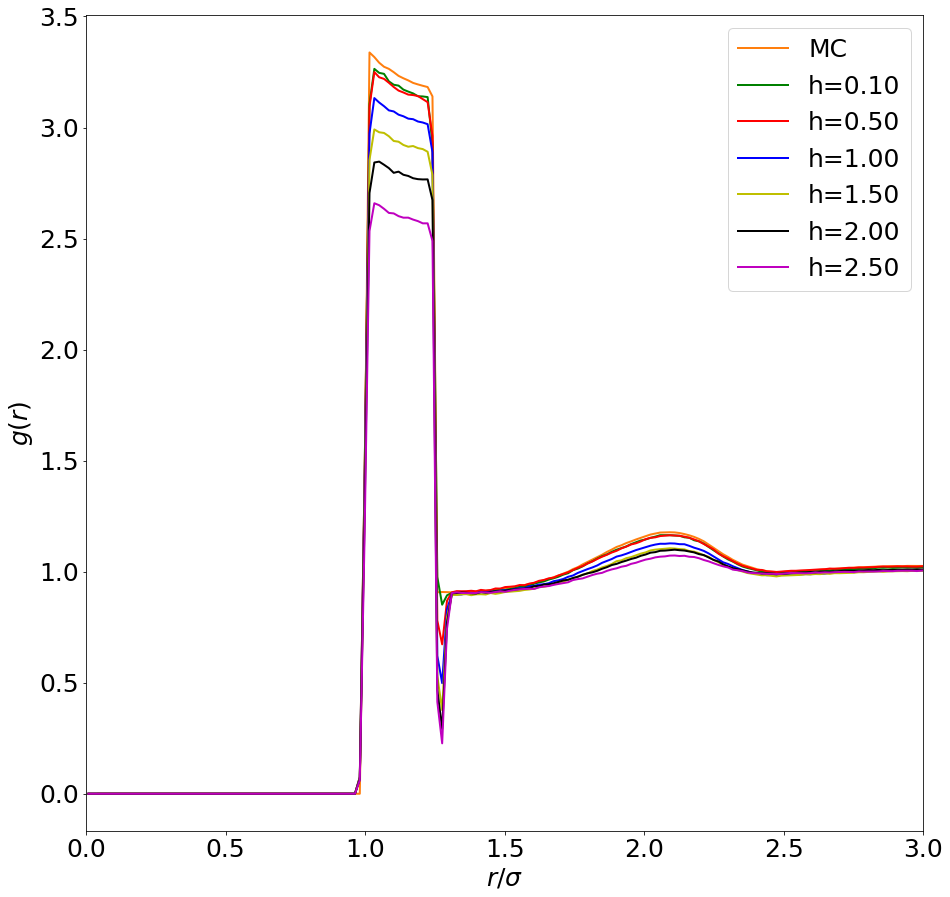

In [12]:
plt.rcParams["figure.figsize"] = (15, 15)
plt.rcParams.update({'font.size':25})
lw = 2
plt.plot(g7[0:,0], g7[0:,1], color='tab:orange', label='MC', linewidth = lw)
plt.plot(g[0:,0], g[0:,1], color='g', label="h=0.10", linewidth = lw)
plt.plot(g2[0:,0], g2[0:,1], color='r', label='h=0.50', linewidth = lw)
plt.plot(g3[0:,0], g3[0:,1], color='b', label='h=1.00', linewidth = lw)
plt.plot(g4[0:,0], g4[0:,1], color='y', label='h=1.50', linewidth = lw)
plt.plot(g5[0:,0], g5[0:,1], color='k', label='h=2.00', linewidth = lw)
plt.plot(g6[0:,0], g6[0:,1], color='m', label='h=2.50', linewidth = lw)
plt.ylabel("$g(r)$") 
plt.xlabel("$r/\\sigma$")
plt.legend()
plt.xlim(0,3)
plt.savefig("Grafica_de_gr.pdf", bbox_inches='tight')
plt.savefig("Grafica_de_gr.jpg", bbox_inches='tight')

## Grafica de energia por particula (h=.10)

Text(0.5,1,'Energia por particula (h=0.10)')

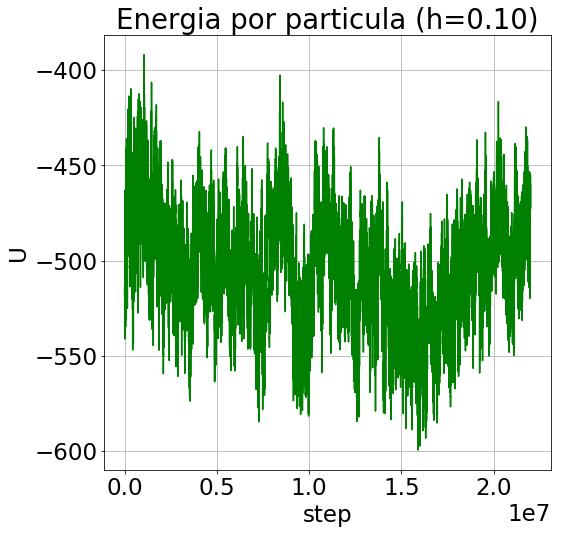

In [40]:
plt.rcParams["figure.figsize"] = (8,8)
plt.plot(e[0:,0], e[0:,1], color='g')
plt.grid(b=None, which='major', axis='both')
plt.ylabel("U") 
plt.xlabel("step")
plt.title("Energia por particula (h=0.10)")

## Configuraciones finales

In [14]:
r = 0.000001/2
diametro = 0.000001
phi = 0.1
dd = math.pow(3.14159265358 * diametro * diametro * diametro / (6 * phi),1 / 3)
r = diametro / dd

pi = np.pi
cos = np.cos
sin = np.sin
phi, theta = np.mgrid[0.0:pi:20j, 0.0:2.0*pi:20j]
x = r*sin(phi)*cos(theta)
y = r*sin(phi)*sin(theta)
z = r*cos(phi)


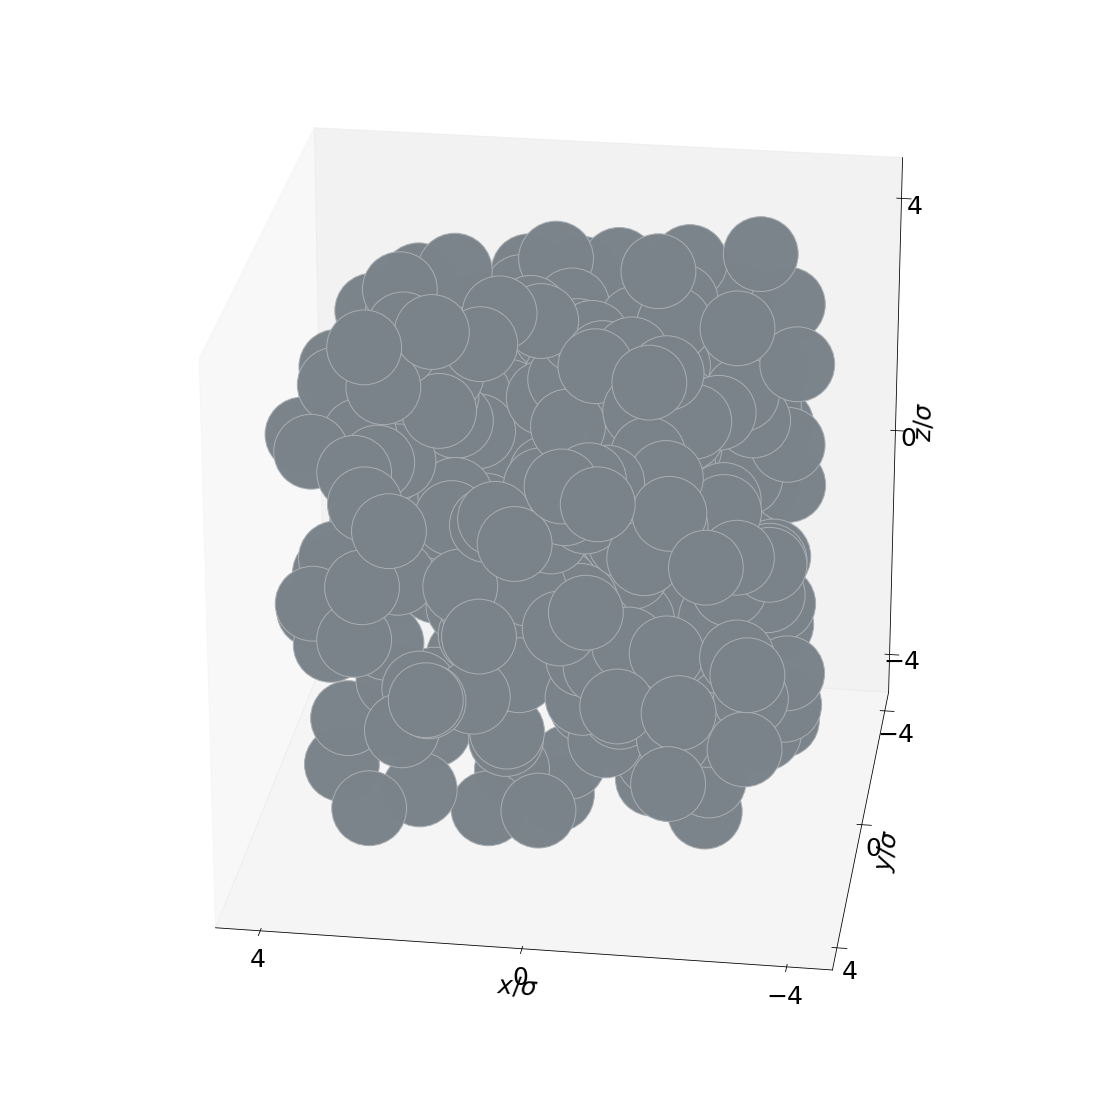

In [16]:
#MC
fig = pyplot.figure()
plt.rcParams["figure.figsize"] = (15,15)
plt.rcParams.update({'font.size':25})
ax = Axes3D(fig)
ax.grid(False)

ax.scatter(x0, y0, z0, color=[(123/255,131/255,138/255)], s=5600, alpha = 0.99, edgecolors=[(169/255,174/255,178/255)])
ax.set_xlabel("$x/\sigma$") 
ax.set_ylabel("$y/\sigma$")
ax.set_zlabel("$z/\sigma$")
ax.xaxis.set_major_locator(MaxNLocator(2))
ax.yaxis.set_major_locator(MaxNLocator(2))
ax.zaxis.set_major_locator(MaxNLocator(2))
ax.view_init(25, 98)


ax.set_xlim([-4.5, 4.5])
ax.set_ylim([-4.5, 4.5])
ax.set_zlim([-4.5, 4.5])
plt.savefig("Configuracion_final_MC_DB3.pdf", bbox_inches='tight')

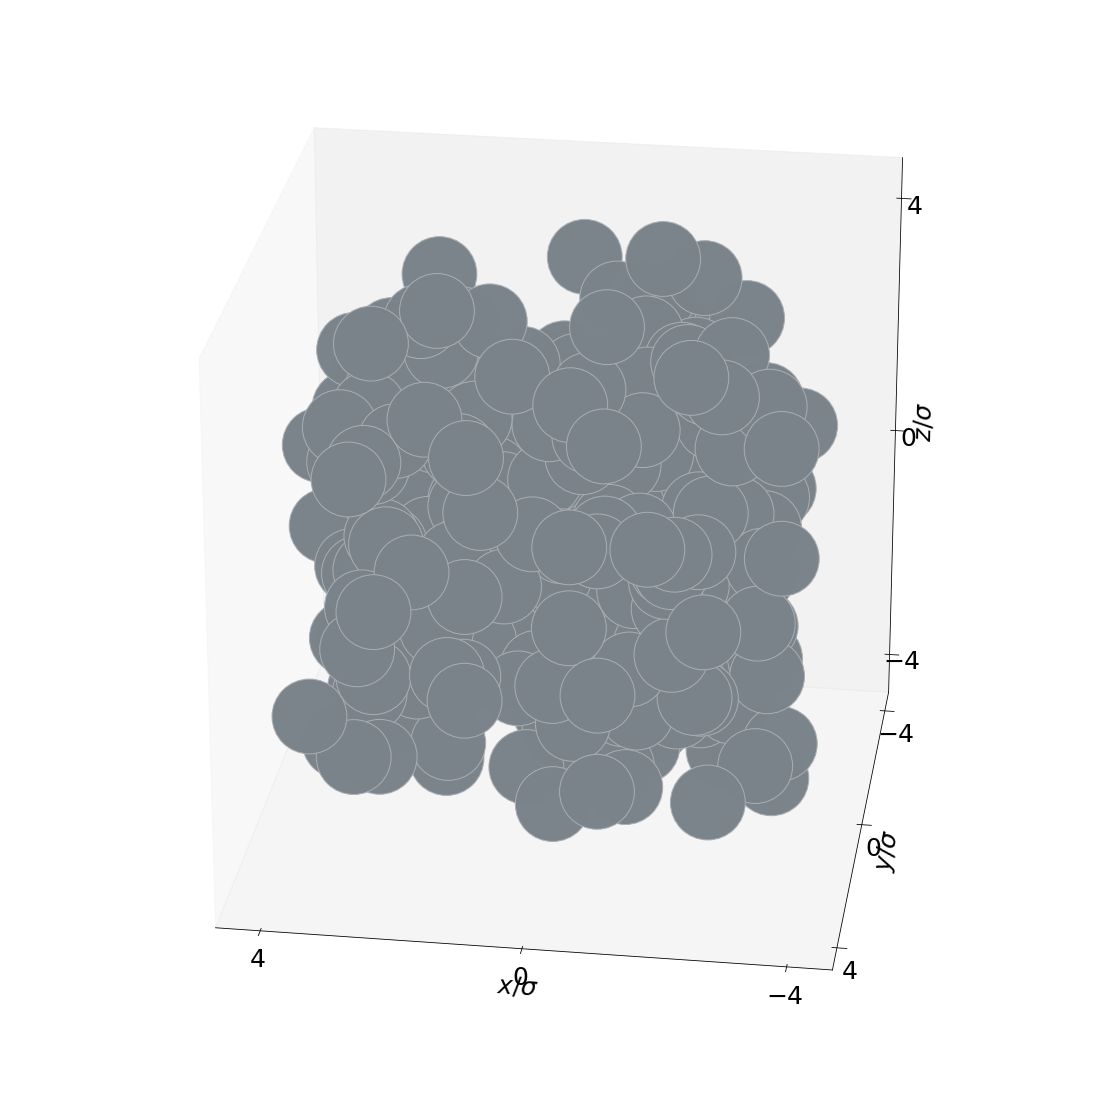

In [17]:
#0.1
fig = pyplot.figure()
plt.rcParams["figure.figsize"] = (15,15)
plt.rcParams.update({'font.size':25})
ax = Axes3D(fig)
ax.grid(False)

ax.scatter(x1, y1, z1, color=[(123/255,131/255,138/255)], s=5600, alpha = 0.99, edgecolors=[(169/255,174/255,178/255)])
ax.set_xlabel("$x/\sigma$") 
ax.set_ylabel("$y/\sigma$")
ax.set_zlabel("$z/\sigma$")
ax.xaxis.set_major_locator(MaxNLocator(2))
ax.yaxis.set_major_locator(MaxNLocator(2))
ax.zaxis.set_major_locator(MaxNLocator(2))
ax.view_init(25, 98)


ax.set_xlim([-4.5, 4.5])
ax.set_ylim([-4.5, 4.5])
ax.set_zlim([-4.5, 4.5])
plt.savefig("Configuracion_final_0.1_DB3.pdf", bbox_inches='tight')

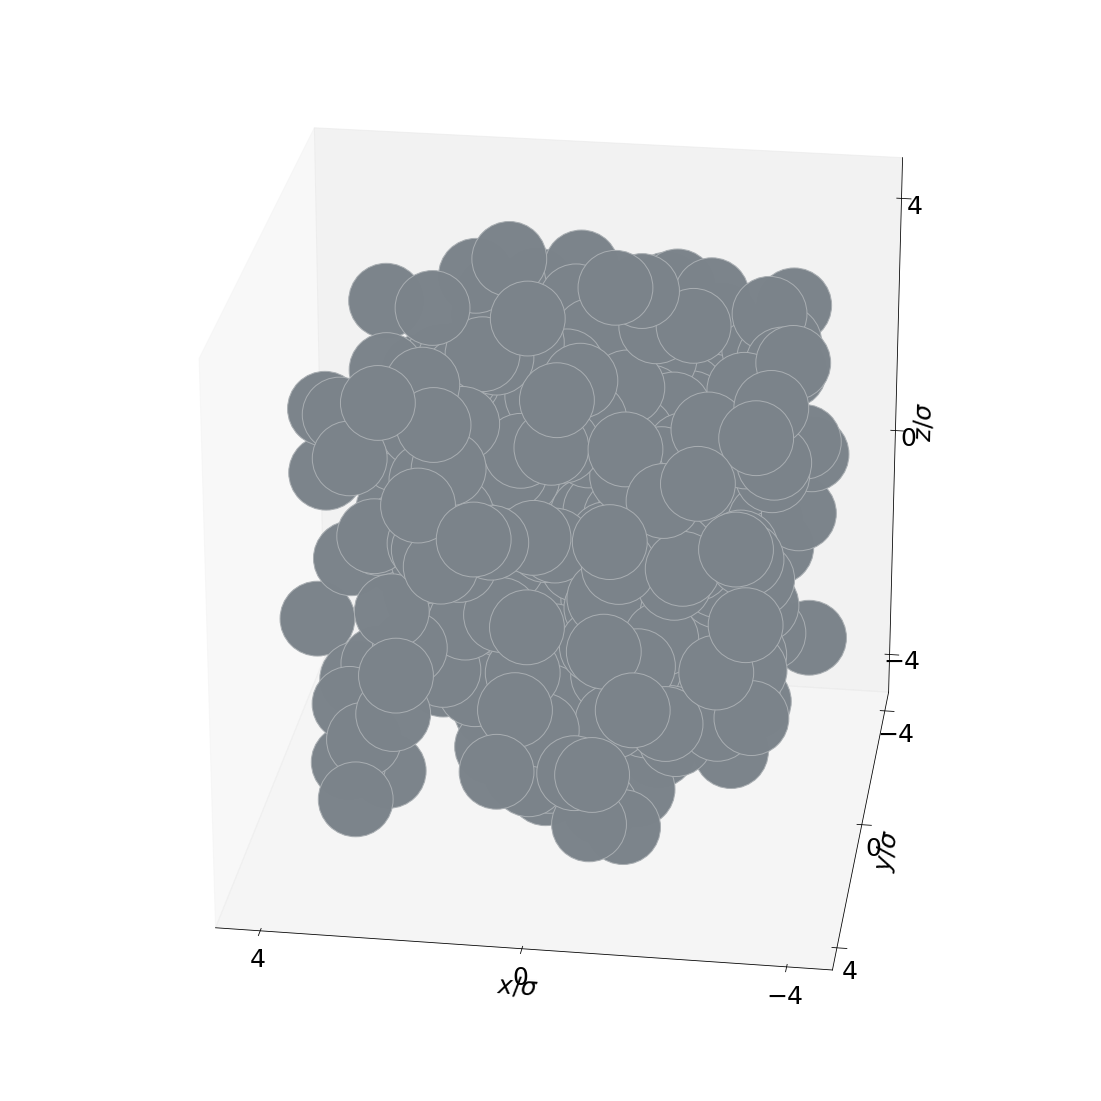

In [18]:
#0.5
fig = pyplot.figure()
plt.rcParams["figure.figsize"] = (15,15)
plt.rcParams.update({'font.size':25})
ax = Axes3D(fig)
ax.grid(False)

ax.scatter(x2, y2, z2, color=[(123/255,131/255,138/255)], s=5600, alpha = 0.99, edgecolors=[(169/255,174/255,178/255)])
ax.set_xlabel("$x/\sigma$") 
ax.set_ylabel("$y/\sigma$")
ax.set_zlabel("$z/\sigma$")
ax.xaxis.set_major_locator(MaxNLocator(2))
ax.yaxis.set_major_locator(MaxNLocator(2))
ax.zaxis.set_major_locator(MaxNLocator(2))
ax.view_init(25, 98)


ax.set_xlim([-4.5, 4.5])
ax.set_ylim([-4.5, 4.5])
ax.set_zlim([-4.5, 4.5])
plt.savefig("Configuracion_final_0.5_DB3.pdf", bbox_inches='tight')

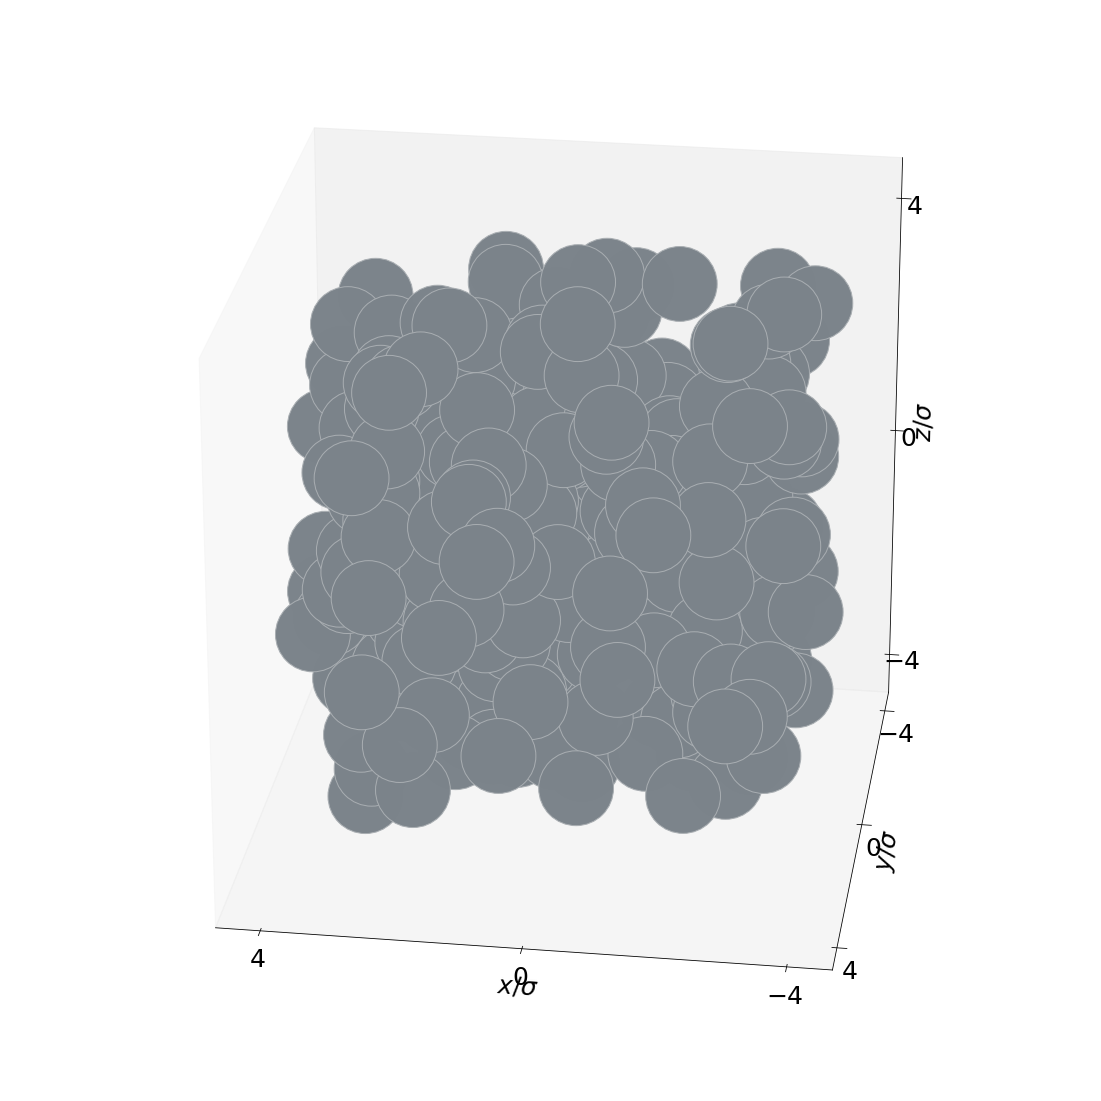

In [19]:
#1.0
fig = pyplot.figure()
plt.rcParams["figure.figsize"] = (15,15)
plt.rcParams.update({'font.size':25})
ax = Axes3D(fig)
ax.grid(False)

ax.scatter(x3, y3, z3, color=[(123/255,131/255,138/255)], s=5600, alpha = 0.99, edgecolors=[(169/255,174/255,178/255)])
ax.set_xlabel("$x/\sigma$") 
ax.set_ylabel("$y/\sigma$")
ax.set_zlabel("$z/\sigma$")
ax.xaxis.set_major_locator(MaxNLocator(2))
ax.yaxis.set_major_locator(MaxNLocator(2))
ax.zaxis.set_major_locator(MaxNLocator(2))
ax.view_init(25, 98)


ax.set_xlim([-4.5, 4.5])
ax.set_ylim([-4.5, 4.5])
ax.set_zlim([-4.5, 4.5])
plt.savefig("Configuracion_final_1.0_DB3.pdf", bbox_inches='tight')

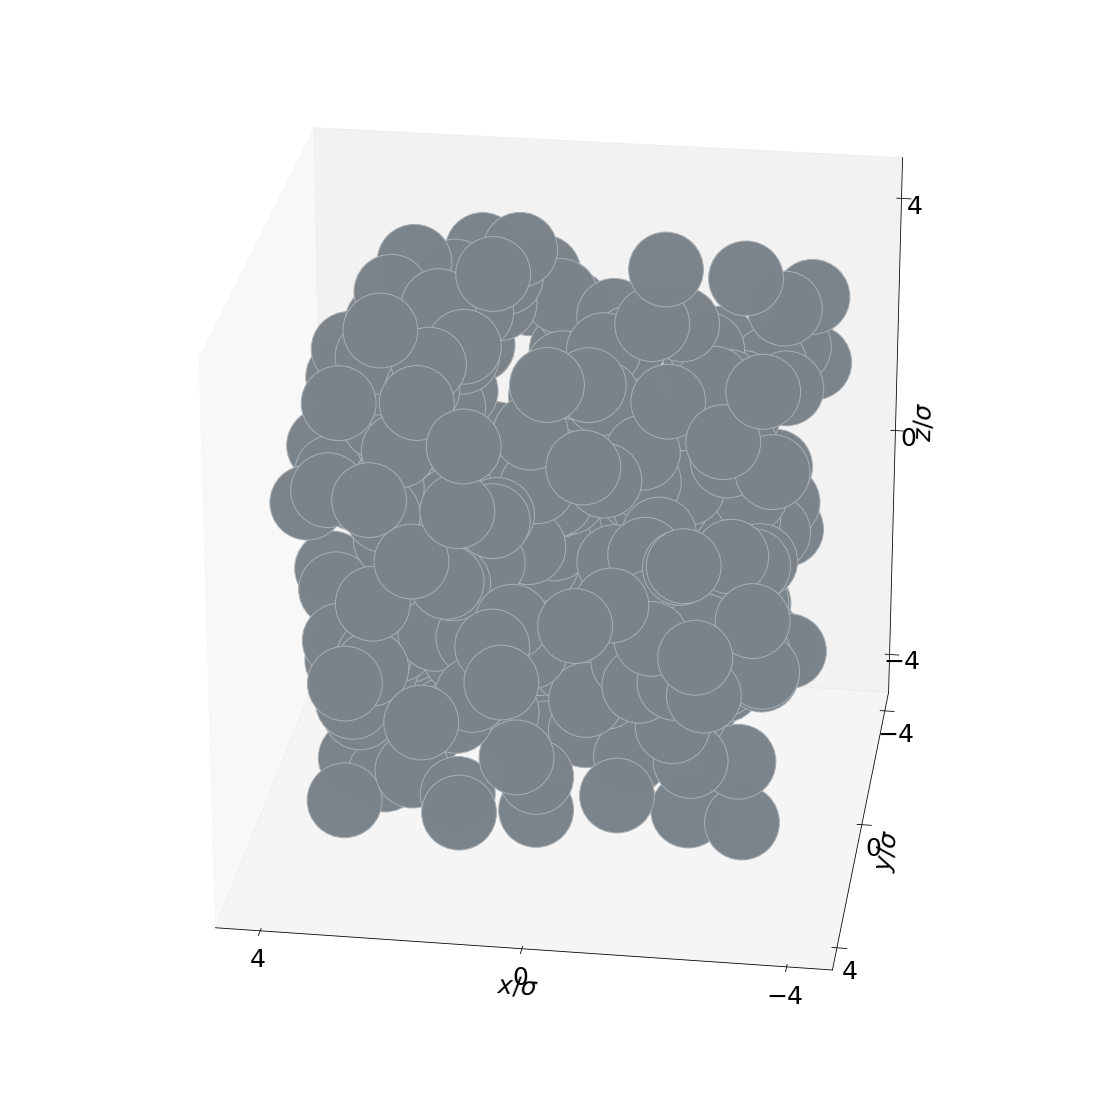

In [20]:
#1.5
fig = pyplot.figure()
plt.rcParams["figure.figsize"] = (15,15)
plt.rcParams.update({'font.size':25})
ax = Axes3D(fig)
ax.grid(False)

ax.scatter(x4, y4, z4, color=[(123/255,131/255,138/255)], s=5600, alpha = 0.99, edgecolors=[(169/255,174/255,178/255)])
ax.set_xlabel("$x/\sigma$") 
ax.set_ylabel("$y/\sigma$")
ax.set_zlabel("$z/\sigma$")
ax.xaxis.set_major_locator(MaxNLocator(2))
ax.yaxis.set_major_locator(MaxNLocator(2))
ax.zaxis.set_major_locator(MaxNLocator(2))
ax.view_init(25, 98)


ax.set_xlim([-4.5, 4.5])
ax.set_ylim([-4.5, 4.5])
ax.set_zlim([-4.5, 4.5])
plt.savefig("Configuracion_final_1.5_DB3.pdf", bbox_inches='tight')

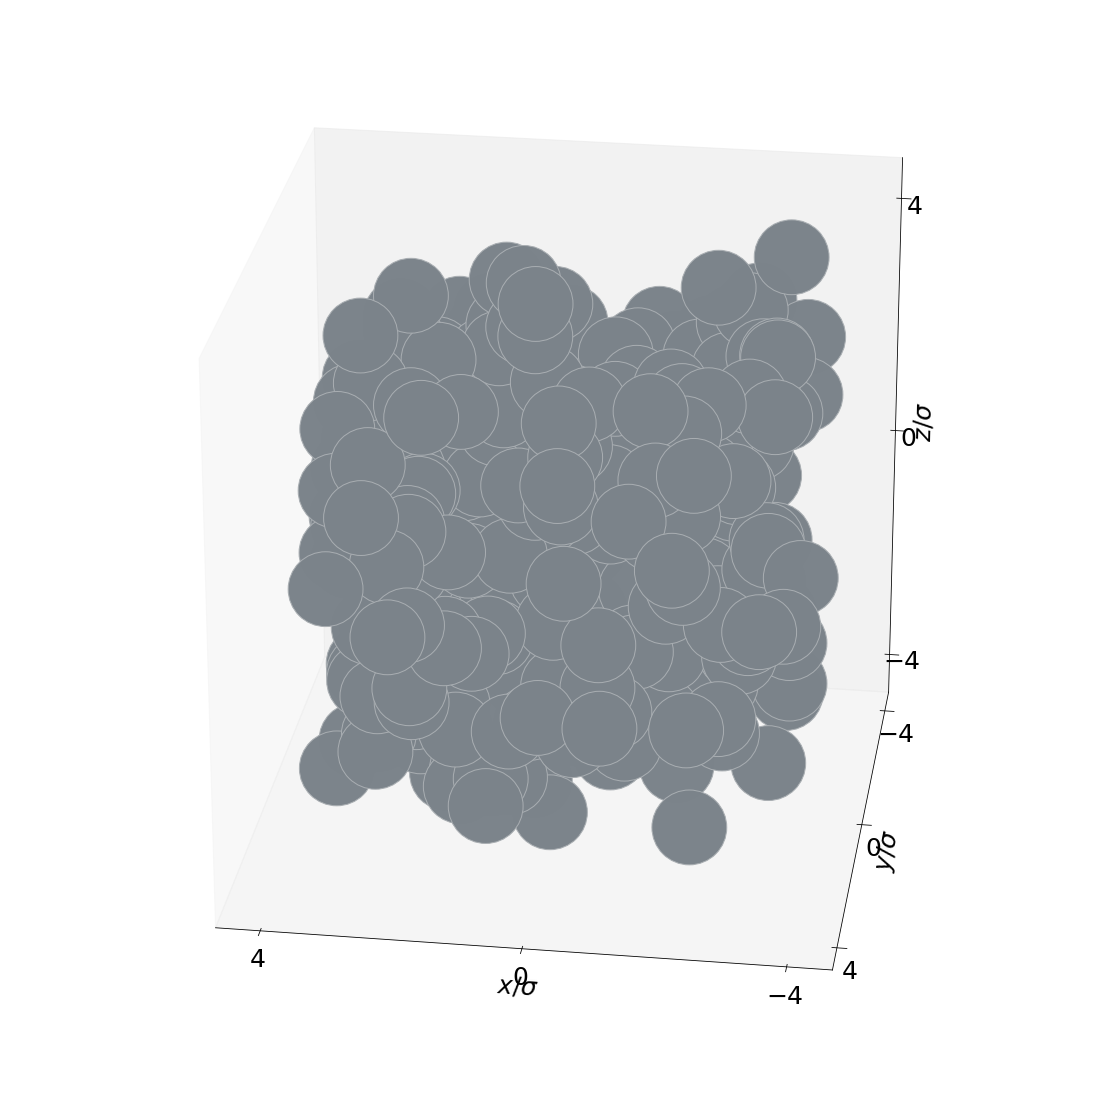

In [21]:
#2.0
fig = pyplot.figure()
plt.rcParams["figure.figsize"] = (15,15)
plt.rcParams.update({'font.size':25})
ax = Axes3D(fig)
ax.grid(False)

ax.scatter(x5, y5, z5, color=[(123/255,131/255,138/255)], s=5600, alpha = 0.99, edgecolors=[(169/255,174/255,178/255)])
ax.set_xlabel("$x/\sigma$") 
ax.set_ylabel("$y/\sigma$")
ax.set_zlabel("$z/\sigma$")
ax.xaxis.set_major_locator(MaxNLocator(2))
ax.yaxis.set_major_locator(MaxNLocator(2))
ax.zaxis.set_major_locator(MaxNLocator(2))
ax.view_init(25, 98)


ax.set_xlim([-4.5, 4.5])
ax.set_ylim([-4.5, 4.5])
ax.set_zlim([-4.5, 4.5])
plt.savefig("Configuracion_final_2.0_DB3.pdf", bbox_inches='tight')

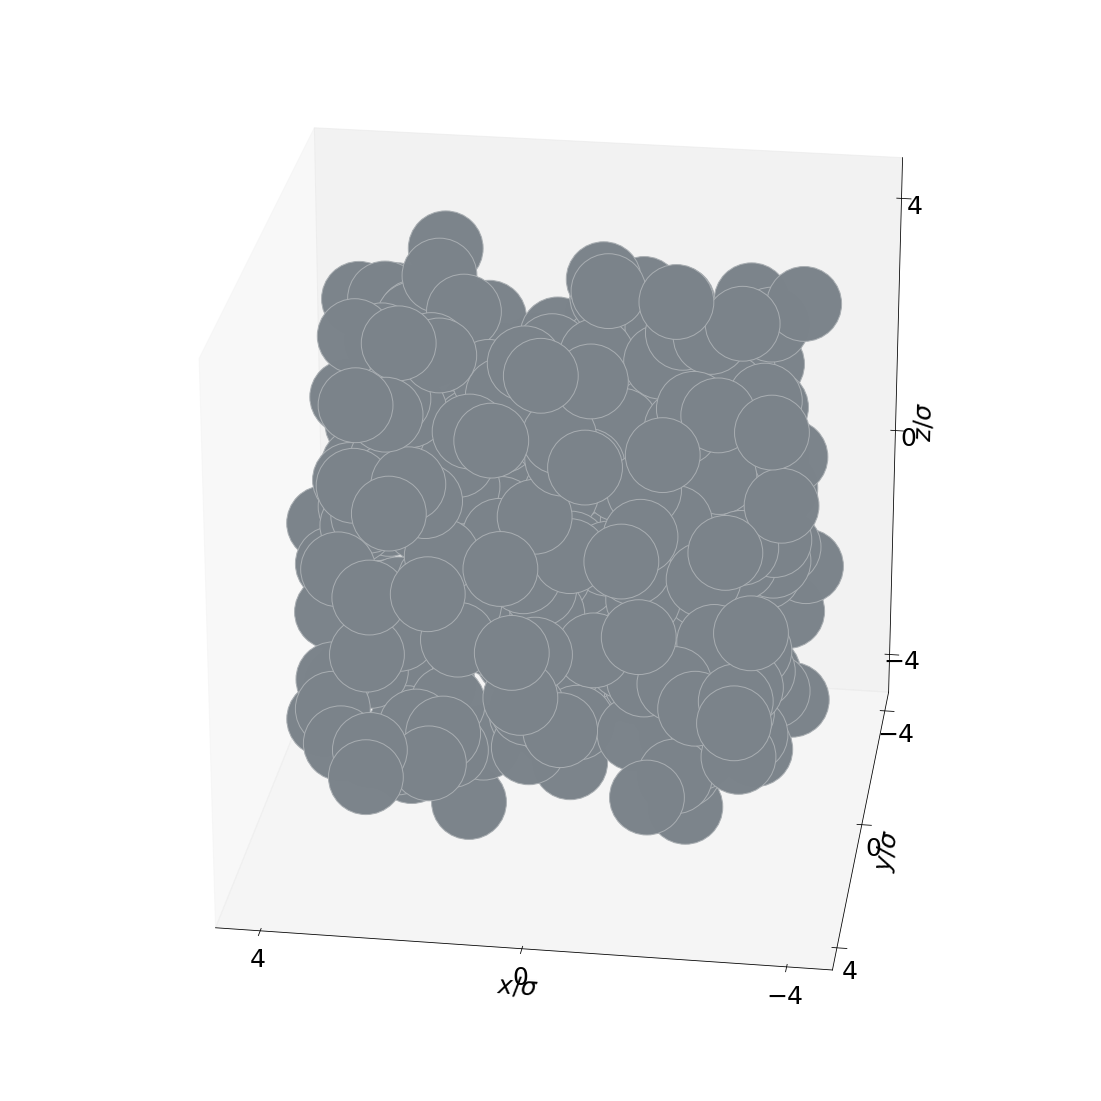

In [22]:
#2.5
fig = pyplot.figure()
plt.rcParams["figure.figsize"] = (15,15)
plt.rcParams.update({'font.size':25})
ax = Axes3D(fig)
ax.grid(False)

ax.scatter(x6, y6, z6, color=[(123/255,131/255,138/255)], s=5600, alpha = 0.99, edgecolors=[(169/255,174/255,178/255)])
ax.set_xlabel("$x/\sigma$") 
ax.set_ylabel("$y/\sigma$")
ax.set_zlabel("$z/\sigma$")
ax.xaxis.set_major_locator(MaxNLocator(2))
ax.yaxis.set_major_locator(MaxNLocator(2))
ax.zaxis.set_major_locator(MaxNLocator(2))
ax.view_init(25, 98)


ax.set_xlim([-4.5, 4.5])
ax.set_ylim([-4.5, 4.5])
ax.set_zlim([-4.5, 4.5])
plt.savefig("Configuracion_final_2.5_DB3.pdf", bbox_inches='tight')

# Graficas de numero de vecinos por cada particula

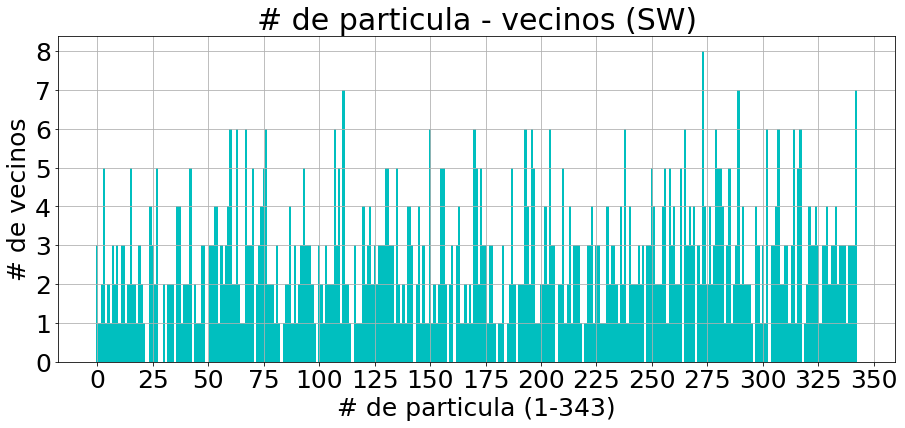

In [23]:
plt.rcParams["figure.figsize"] = (15,6)
fig, ax = plt.subplots(figsize=(15, 6))
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_major_locator(MultipleLocator(25))
plt.title("# de particula - vecinos (SW)")
plt.ylabel("# de vecinos") 
plt.xlabel("# de particula (1-343)")
a = np.arange(0,343,1)
plt.bar(a, vec0, color = 'c',width=1)
plt.grid(True)
plt.savefig("vpp_0.1.jpg", bbox_inches='tight')

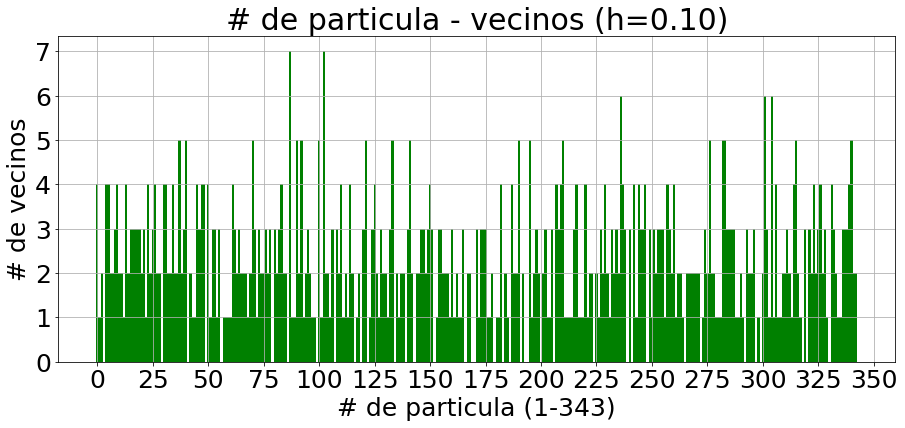

In [24]:
plt.rcParams["figure.figsize"] = (15,6)
fig, ax = plt.subplots(figsize=(15, 6))
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_major_locator(MultipleLocator(25))
plt.title("# de particula - vecinos (h=0.10)")
plt.ylabel("# de vecinos") 
plt.xlabel("# de particula (1-343)")
a = np.arange(0,343,1)
plt.bar(a, vec1, color = 'g',width=1)
plt.grid(True)
plt.savefig("vpp_0.1.jpg", bbox_inches='tight')

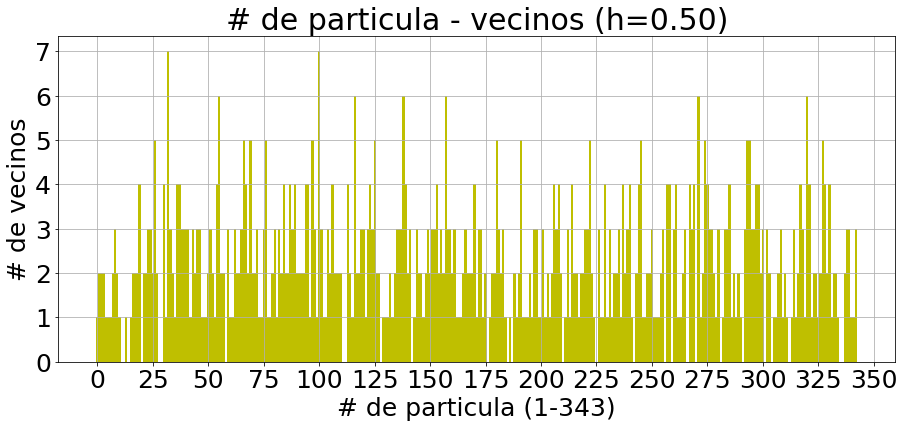

In [25]:
plt.rcParams["figure.figsize"] = (15,6)
fig, ax = plt.subplots(figsize=(15, 6))
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_major_locator(MultipleLocator(25))
plt.title("# de particula - vecinos (h=0.50)")
plt.ylabel("# de vecinos") 
plt.xlabel("# de particula (1-343)")
a = np.arange(0,343,1)
plt.bar(a, vec2, color = 'y',width=1)
plt.grid(True)
plt.savefig("vpp_0.5.jpg", bbox_inches='tight')

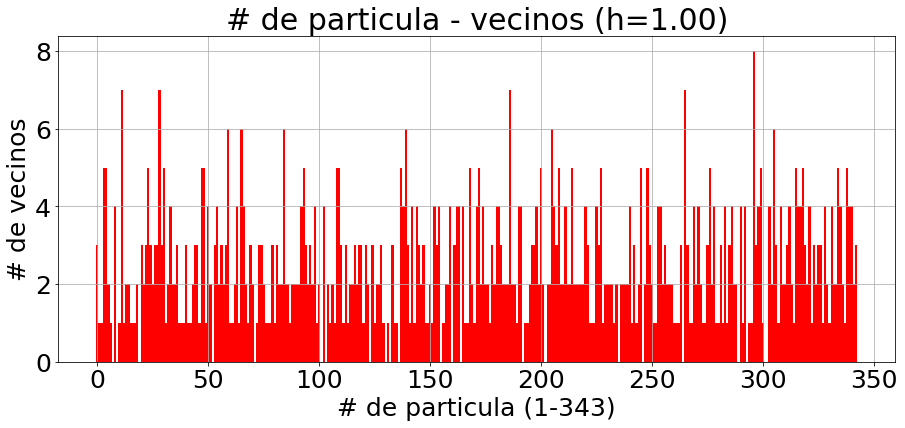

In [26]:
plt.rcParams["figure.figsize"] = (15,6)
fig, ax = plt.subplots(figsize=(15, 6))
#ax.yaxis.set_major_locator(MultipleLocator(1))
#ax.xaxis.set_major_locator(MultipleLocator(25))
plt.title("# de particula - vecinos (h=1.00)")
plt.ylabel("# de vecinos") 
plt.xlabel("# de particula (1-343)")
a = np.arange(0,343,1)
plt.bar(a, vec3, color = 'r',width=1)
plt.grid(True)
plt.savefig("vpp_1.0.jpg", bbox_inches='tight')

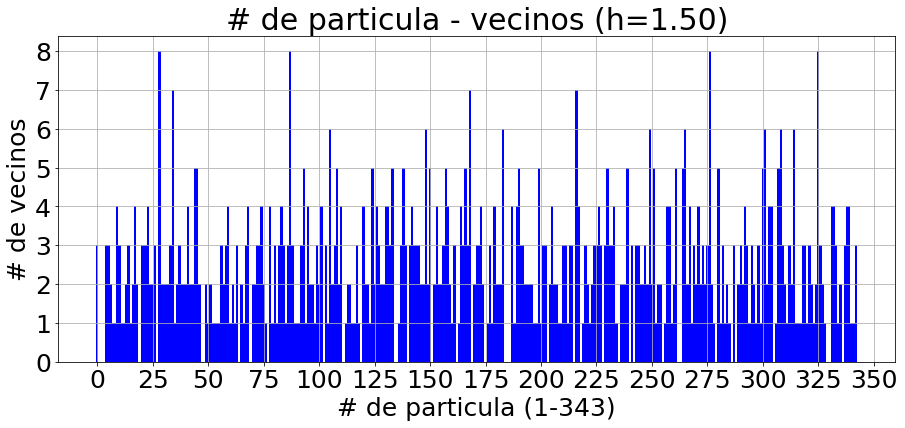

In [27]:
plt.rcParams["figure.figsize"] = (15,6)
fig, ax = plt.subplots(figsize=(15, 6))
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_major_locator(MultipleLocator(25))
plt.title("# de particula - vecinos (h=1.50)")
plt.ylabel("# de vecinos") 
plt.xlabel("# de particula (1-343)")
a = np.arange(0,343,1)
plt.bar(a, vec4, color = 'b',width=1)
plt.grid(True)
plt.savefig("vpp_1.5.jpg", bbox_inches='tight')

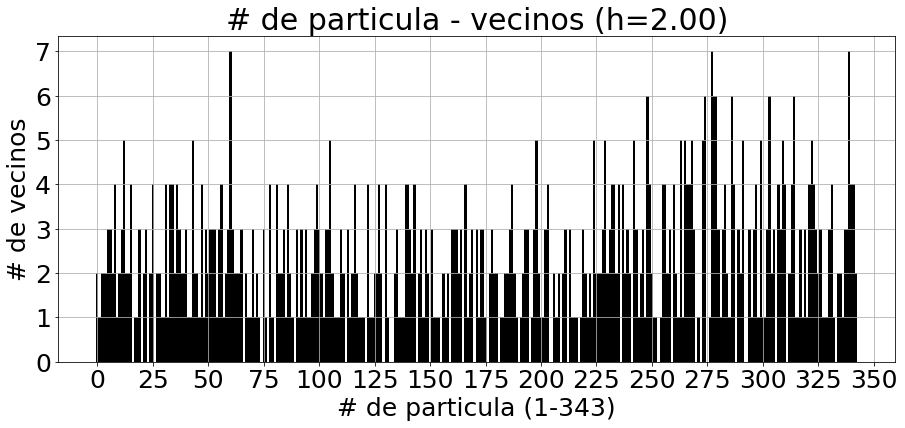

In [28]:
plt.rcParams["figure.figsize"] = (15,6)
fig, ax = plt.subplots(figsize=(15, 6))
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_major_locator(MultipleLocator(25))
plt.title("# de particula - vecinos (h=2.00)")
plt.ylabel("# de vecinos") 
plt.xlabel("# de particula (1-343)")
a = np.arange(0,343,1)
plt.bar(a, vec5, color = 'k',width=1)
plt.grid(True)
plt.savefig("vpp_2.0.jpg", bbox_inches='tight')

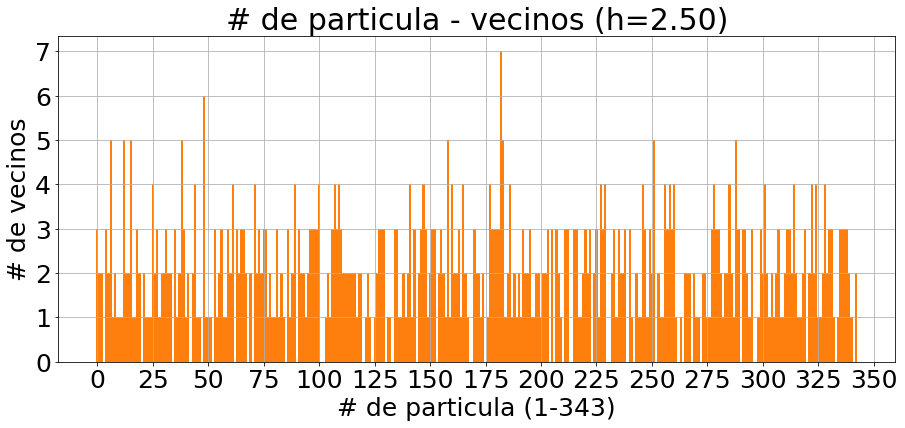

In [29]:
plt.rcParams["figure.figsize"] = (15,6)
fig, ax = plt.subplots(figsize=(15, 6))
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_major_locator(MultipleLocator(25))
plt.title("# de particula - vecinos (h=2.50)")
plt.ylabel("# de vecinos") 
plt.xlabel("# de particula (1-343)")
a = np.arange(0,343,1)
plt.bar(a, vec6, color = 'tab:orange',width=1)
plt.grid(True)
plt.savefig("vpp_2.5.jpg", bbox_inches='tight')

# Histograma

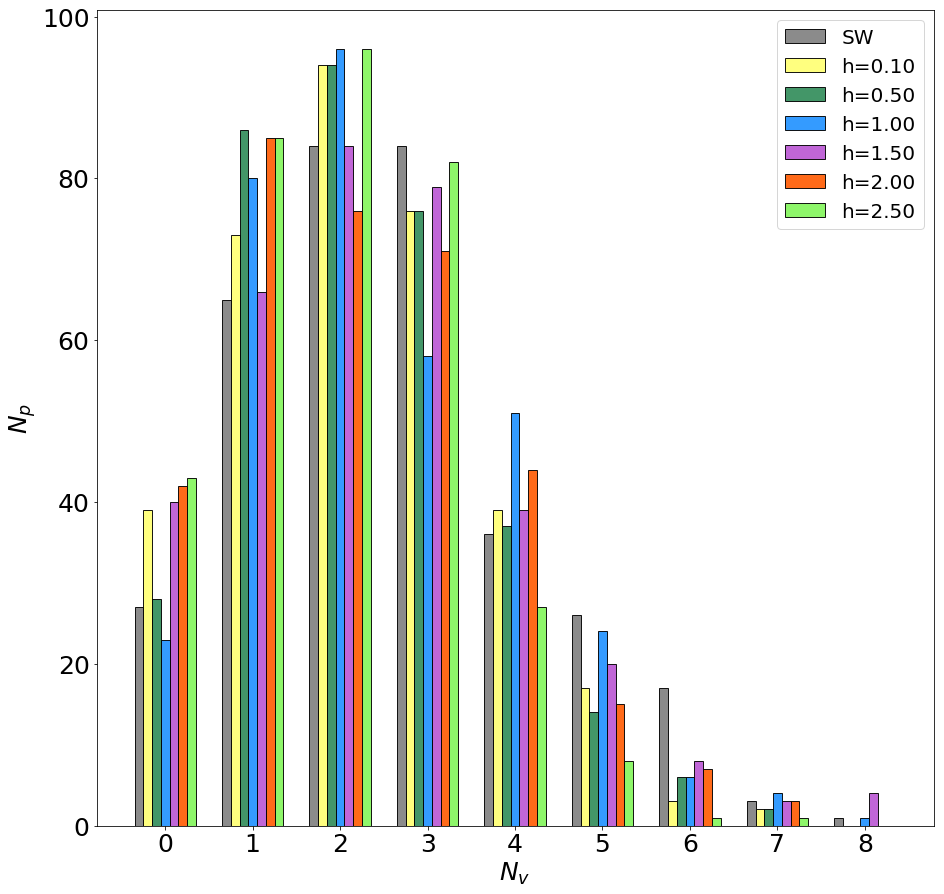

In [30]:
plt.rcParams["figure.figsize"] = (15, 15)
ax = figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.rcParams.update({'font.size':20})
nbins = 10
aw0=np.histogram(vec0, bins=np.arange(nbins))
aw=np.histogram(vec1, bins=np.arange(nbins))
aw2=np.histogram(vec2, bins=np.arange(nbins))
aw3=np.histogram(vec3, bins=np.arange(nbins))
aw4=np.histogram(vec4, bins=np.arange(nbins))
aw5=np.histogram(vec5, bins=np.arange(nbins))
aw6=np.histogram(vec6, bins=np.arange(nbins))
b0 = np.asarray(aw0)
b = np.asarray(aw)
b2 = np.asarray(aw2)
b3 = np.asarray(aw3)
b4 = np.asarray(aw4)
b5 = np.asarray(aw5)
b6 = np.asarray(aw6)
y0 = [b0[0][0], b0[0][1], b0[0][2], b0[0][3], b0[0][4], b0[0][5], b0[0][6], b0[0][7], b0[0][8]]
y = [b[0][0], b[0][1], b[0][2], b[0][3], b[0][4], b[0][5], b[0][6], b[0][7], b[0][8]]
y2 = [b2[0][0], b2[0][1], b2[0][2], b2[0][3], b2[0][4], b2[0][5], b2[0][6], b2[0][7], b2[0][8]]
y3 = [b3[0][0], b3[0][1], b3[0][2], b3[0][3], b3[0][4], b3[0][5], b3[0][6], b3[0][7], b3[0][8]]
y4 = [b4[0][0], b4[0][1], b4[0][2], b4[0][3], b4[0][4], b4[0][5], b4[0][6], b4[0][7], b4[0][8]]
y5 = [b5[0][0], b5[0][1], b5[0][2], b5[0][3], b5[0][4], b5[0][5], b5[0][6], b5[0][7], b5[0][8]]
y6 = [b6[0][0], b6[0][1], b6[0][2], b6[0][3], b6[0][4], b6[0][5], b6[0][6], b6[0][7], b6[0][8]]
X = np.arange(nbins-1)
plt.bar(X-.3, y0, edgecolor='k',color = 'tab:gray',width=0.1, alpha=0.9, label='SW')
plt.bar(X-.2, y, edgecolor='k',color = [(255/255,255/255,113/255)],width=0.1, alpha=0.9, label='h=0.10')
plt.bar(X-.1, y2, edgecolor='k',color = [(46/255,139/255,87/255)],width=0.1, alpha=0.9, label='h=0.50')
plt.bar(X, y3, edgecolor='k',color = [(30/255,144/255,255/255)],width=0.1, alpha=0.9, label='h=1.00')
plt.bar(X+.1, y4, edgecolor='k',color = [(186/255,85/255,211/255)],width=0.1, alpha=0.9, label='h=1.50')
plt.bar(X+.2, y5, edgecolor='k',color = [(255/255,90/255,0/255)],width=0.1, alpha=0.9, label='h=2.00')
plt.bar(X+.3, y6, edgecolor='k',color =[(130/255,245/255,90/255)],width=0.1, alpha=0.9, label='h=2.50')
plt.ylabel('$N_{p}$') 
plt.xlabel('$N_{v}$')
ax.xaxis.set_major_locator(MultipleLocator(1))
plt.legend()
plt.savefig("Histograma.pdf", bbox_inches='tight')
plt.savefig("Histograma.jpg", bbox_inches='tight')

# Graficas de Fself

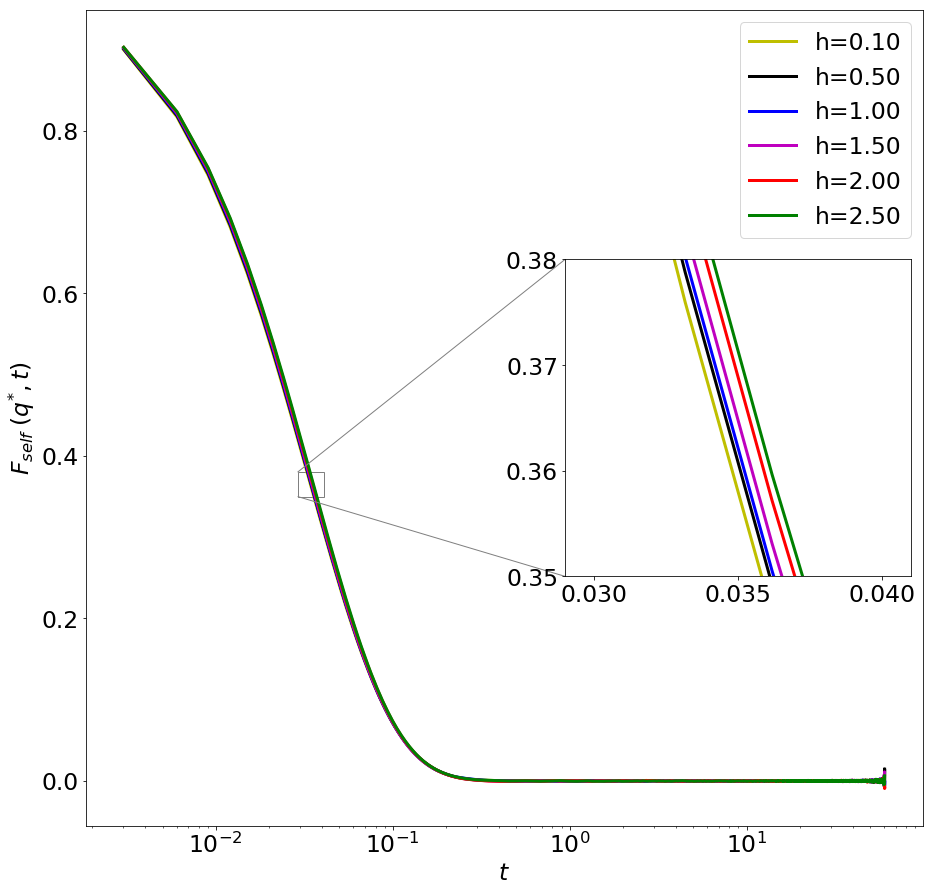

In [41]:
plt.rcParams["figure.figsize"] = (15,15)
plt.rcParams.update({'font.size':23.5})
fig, ax = plt.subplots()

plt.ylabel('$F_{self}\;(q^{*},t)$') 
plt.xlabel('$t$')
ax.semilogx(fself[0:,0],fself[0:,1],color= 'y', label='h=0.10', linewidth = 3)
ax.semilogx(fself2[0:,0],fself2[0:,1],color='k', label='h=0.50', linewidth = 3)
ax.semilogx(fself3[0:,0],fself3[0:,1],color='b', label='h=1.00', linewidth = 3)
ax.semilogx(fself4[0:,0],fself4[0:,1],color='m', label='h=1.50', linewidth = 3)
ax.semilogx(fself5[0:,0],fself5[0:,1],color='r', label='h=2.00', linewidth = 3)
ax.semilogx(fself6[0:,0],fself6[0:,1],color='g', label='h=2.50', linewidth = 3)
#ax.plot([tvm1, tvm1], [0, 1])
#ax.plot([0, 10], [0.36787944117144, 0.36787944117144])
plt.legend()
axins = zoomed_inset_axes(ax, 13, loc=7)
axins.xaxis.set_major_locator(MultipleLocator(.005))
axins.yaxis.set_major_locator(MultipleLocator(.01))

axins.plot(fself[0:,0],fself[0:,1],color='y', label='$h^{*}=h/k_{B}T=0.10$', linewidth = 3)
axins.plot(fself2[0:,0],fself2[0:,1],color='k', label='$h^{*}=0.50$', linewidth = 3)
axins.plot(fself3[0:,0],fself3[0:,1],color='b', label='$h^{*}=1.00$', linewidth = 3)
axins.plot(fself4[0:,0],fself4[0:,1],color='m', label='$h^{*}=1.50$', linewidth = 3)
axins.plot(fself5[0:,0],fself5[0:,1],color='r', label='$h^{*}=2.00$', linewidth = 3)
axins.plot(fself6[0:,0],fself6[0:,1],color='g', label='$h^{*}=2.50$', linewidth = 3)
#axins.plot([tvm1, tvm1], [0, 1])
#axins.plot([0, 10], [0.36787944117144, 0.36787944117144])

x1, x2, y1, y2 = .029, .041, .35, .38
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
mark_inset(ax, axins, loc1=2, loc2 =3, fc = "none", ec = "0.5")
plt.savefig("Grafica_de_Fself.pdf", bbox_inches='tight')
plt.savefig("Grafica_de_Fself.jpg", bbox_inches='tight')

# Tiempo de vida medio del enlace

El tiempo de vida medio es aquel para cual Fself = e^-1

In [35]:
# Obtenemos el tiempo de vida medio del enlace para la funcion Fself
tvm1, loc1 = find(fself[0:,0], fself[0:,1] , 0.36787944117144)
tvm2, loc2 = find(fself2[0:,0], fself2[0:,1] , 0.36787944117144)
tvm3, loc3 = find(fself3[0:,0], fself3[0:,1] , 0.36787944117144)
tvm4, loc4 = find(fself4[0:,0], fself4[0:,1] , 0.36787944117144)
tvm5, loc5 = find(fself5[0:,0], fself5[0:,1] , 0.36787944117144)
tvm6, loc6 = find(fself6[0:,0], fself6[0:,1] , 0.36787944117144)

In [36]:
# Obtenemos el tiempo de vida medio del enlace para la funcion Fself aproximada
tvm1a, loc1a = find(fself[0:,0], fself[0:,2] , 0.36787944117144)
tvm2a, loc2a = find(fself2[0:,0], fself2[0:,2] , 0.36787944117144)
tvm3a, loc3a = find(fself3[0:,0], fself3[0:,2] , 0.36787944117144)
tvm4a, loc4a = find(fself4[0:,0], fself4[0:,2] , 0.36787944117144)
tvm5a, loc5a = find(fself5[0:,0], fself5[0:,2] , 0.36787944117144)
tvm6a, loc6a = find(fself6[0:,0], fself6[0:,2] , 0.36787944117144)

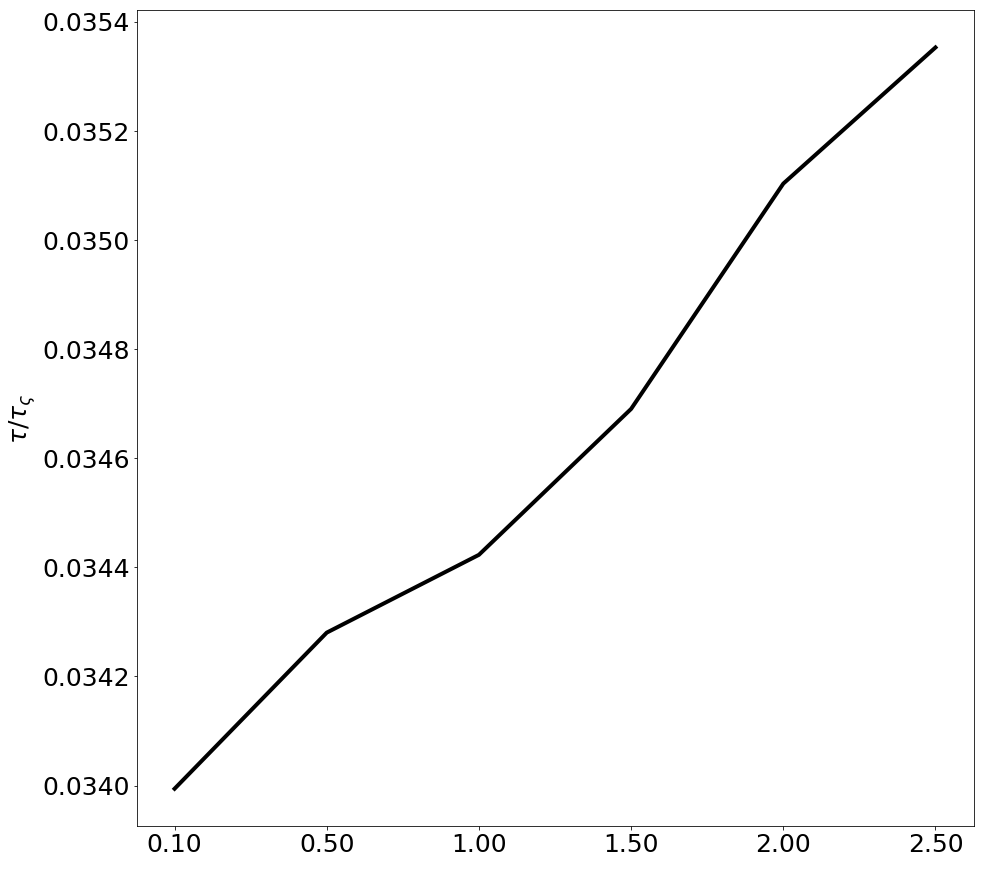

In [38]:
# Usando Fself
plt.rcParams["figure.figsize"] = (15,15)
ax = figure().gca()
#ax.yaxis.set_major_locator(MultipleLocator(0.01))
plt.rcParams.update({'font.size':25})
x = np.array([1, 2, 3, 4, 5, 6])
y = np.array([tvm1, tvm2, tvm3, tvm4, tvm5, tvm6])
my_xticks = ['0.10','0.50','1.00','1.50','2.00','2.50']
plt.xticks(x, my_xticks)
plt.plot(x, y,linewidth = 4, color = 'k')
plt.ylabel('$\\tau  /  \\tau_{\\varsigma}$') 
#plt.xlabel('$h*=h/k_{B}T$')
ax.set_xlabel('                ', style = 'italic')
#plt.ylim(0.0335,0.0356)
plt.savefig("Grafica_de_tiempo_de_vida_medio_Fself.pdf", bbox_inches='tight')
plt.savefig("Grafica_de_tiempo_de_vida_medio_Fself.jpg", bbox_inches='tight')